# Imported libraries 

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Titanic dataset

In [5]:
df = pd.read_csv('C:/Users/Saurabh/Downloads/archive667/Housing.csv')

In [7]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [11]:
print(df.describe())

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


# Check for missing values

In [14]:
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


# Encoding categorical variables

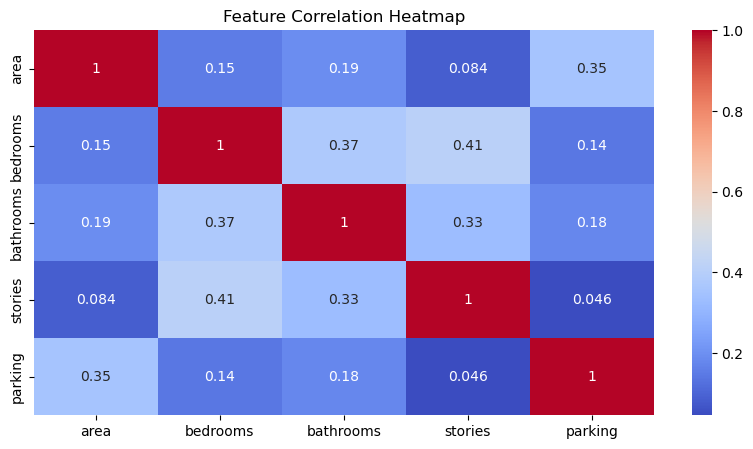

In [55]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[num_df].corr(), cmap='coolwarm', annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()

In [95]:
num_df = df.select_dtypes(include=[np.number]).columns.tolist()
num_df

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Predicding Price based on Area using LR

In [97]:
y=df['price'];
x=df[['area']];
print(x,y);

     area
0    7420
1    8960
2    9960
3    7500
4    7420
..    ...
540  3000
541  2400
542  3620
543  2910
544  3850

[545 rows x 1 columns] 0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64


In [100]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(X_train, X_test, y_train, y_test)

      area
542   3620
496   4000
484   3040
507   3600
252   9860
..     ...
70    4000
277  10360
9     5750
359   3600
192   6600

[436 rows x 1 columns]       area
239   4000
113   9620
325   3460
66   13200
479   3660
..     ...
76    6420
132   5200
311   6060
464   4500
155   6100

[109 rows x 1 columns] 542    1750000
496    2695000
484    2870000
507    2590000
252    4515000
        ...   
70     6790000
277    4305000
9      9800000
359    3710000
192    5040000
Name: price, Length: 436, dtype: int64 239    4585000
113    6083000
325    4007500
66     6930000
479    2940000
        ...   
76     6650000
132    5810000
311    4123000
464    3080000
155    5530000
Name: price, Length: 109, dtype: int64


In [102]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [104]:
y_pred = regressor.predict(X_test)

In [106]:
m = regressor.intercept_;
m

2329244.913495151

In [108]:
c = regressor.coef_[0];
c

475.26784571114615

In [110]:
print("Slope: ",m," Coefficient: ",c);

Slope:  2329244.913495151  Coefficient:  475.26784571114615


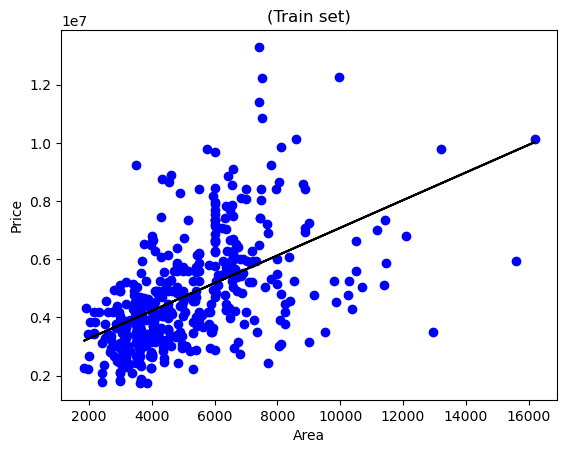

In [116]:
plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X_train, regressor.predict(X_train), color = 'black')
plt.title('(Train set)')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

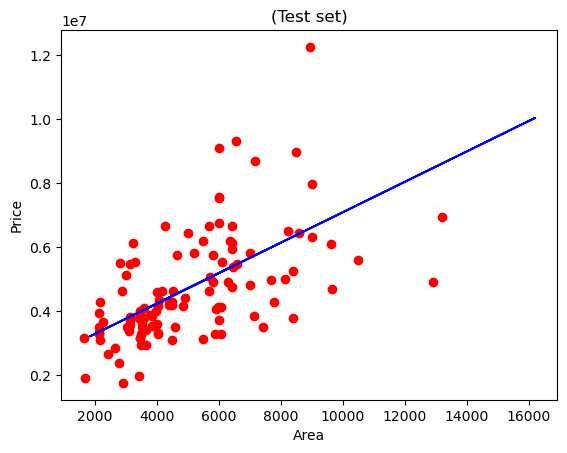

In [118]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('(Test set)')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

In [120]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
accuracy = regressor.score(X_test, y_test) * 100

In [122]:
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")
print(f"Accuracy: {accuracy:.2f}%")

MAE: 1026553.77
MSE: 1997672371756.09
RMSE: 1413390.38
R² Score: 0.3067
Accuracy: 30.67%


# Predicding Price based on number of bathroom using LR

In [125]:
y=df['price'];
x=df[['bathrooms']];
print(x,y);

     bathrooms
0            2
1            4
2            2
3            2
4            1
..         ...
540          1
541          1
542          1
543          1
544          1

[545 rows x 1 columns] 0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64


In [127]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(X_train, X_test, y_train, y_test)

     bathrooms
542          1
496          1
484          1
507          1
252          1
..         ...
70           2
277          1
9            2
359          1
192          1

[436 rows x 1 columns]      bathrooms
239          1
113          1
325          1
66           1
479          1
..         ...
76           2
132          1
311          1
464          1
155          2

[109 rows x 1 columns] 542    1750000
496    2695000
484    2870000
507    2590000
252    4515000
        ...   
70     6790000
277    4305000
9      9800000
359    3710000
192    5040000
Name: price, Length: 436, dtype: int64 239    4585000
113    6083000
325    4007500
66     6930000
479    2940000
        ...   
76     6650000
132    5810000
311    4123000
464    3080000
155    5530000
Name: price, Length: 109, dtype: int64


In [129]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [131]:
y_pred = regressor.predict(X_test)

In [133]:
m = regressor.intercept_;
m

2251159.1043194057

In [135]:
c = regressor.coef_[0];
c

1974092.4202808943

In [137]:
print("Slope: ",m," Coefficient: ",c);

Slope:  2251159.1043194057  Coefficient:  1974092.4202808943
